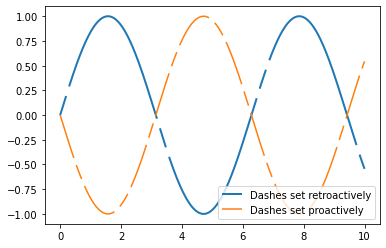

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(x, np.sin(x), '--', linewidth=2,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * np.sin(x), dashes=[30, 5, 10, 5],
                 label='Dashes set proactively')

ax.legend(loc='lower right')

In [16]:
from xlrd import open_workbook

x_data1 = []
y_data2 = []
wb = open_workbook('phase_detector.xlsx')

for s in wb.sheets():
    print('Sheet', s.name)

    for row in range(s.nrows):
        print('the row is', row)
        values = []
        for col in range(s.ncols):
            values.append(s.cell(row, col).value)
        print(values)
        x_data1.append(values[0])
        y_data2.append(values[1])

Sheet 工作表1
the row is 0
[0.0, 0.033]
the row is 1
[10.0, 0.268]
the row is 2
[20.0, 0.504]
the row is 3
[30.0, 0.796]
the row is 4
[40.0, 1.054]
the row is 5
[50.0, -1.306]
the row is 6
[60.0, -6.099]
the row is 7
[70.0, -5.745]
the row is 8
[80.0, -5.269]
the row is 9
[90.0, -4.738]
the row is 10
[100.0, -4.185]
the row is 11
[110.0, -3.653]
the row is 12
[120.0, -3.133]
the row is 13
[130.0, -2.58]
the row is 14
[140.0, -2.016]
the row is 15
[150.0, -1.518]
the row is 16
[160.0, -1.08]
the row is 17
[170.0, -0.632]
the row is 18
[180.0, -0.089]
the row is 19
[190.0, 0.537]
the row is 20
[200.0, 1.116]
the row is 21
[210.0, 1.623]
the row is 22
[220.0, 2.1]
the row is 23
[230.0, 2.598]
the row is 24
[240.0, 3.178]
the row is 25
[250.0, 3.739]
the row is 26
[260.0, 4.232]
the row is 27
[270.0, 4.755]
the row is 28
[280.0, 5.307]
the row is 29
[290.0, 5.786]
the row is 30
[300.0, 6.225]
the row is 31
[310.0, 6.634]
the row is 32
[320.0, -0.767]
the row is 33
[330.0, -0.48]
the row is 34

* 打开一个 Excel 文件后，首先对文件内的 sheet 进行循环，这是最外层循环。
* 在每个 sheet 内，进行第二次循环，行循环。
* 在每行内，进行列循环，这是第三层循环。

在最内层列循环内，取出行列值，复制到新建的 values 列表内，很明显，源数据有几列，values 列表就有几个元素。我们例子中的 Excel 文件有两列，分别对应角度和 DC 值。所以在列循环结束后，我们将取得的数据保存到 x_data1 和 y_data1 这两个列表中。



### 绘制图像 V1
第一个版本的功能很简单，从 Excel 中读取数据，然后绘制成图像。同样先下载所需数据：

Text(0, 0.5, 'output-V')

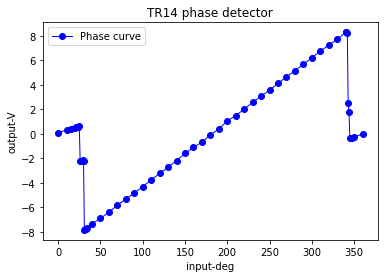

In [18]:
def read_xlsx(name):
    wb = open_workbook(name)
    x_data = []
    y_data = []z
    for s in wb.sheets():
        for row in range(s.nrows):
            values = []
            for col in range(s.ncols):
                values.append(s.cell(row, col).value)
            x_data.append(values[0])
            y_data.append(values[1])
    return x_data, y_data


x_data, y_data = read_xlsx('my_data.xlsx')
plt.plot(x_data, y_data, 'bo-', label=u'Phase curve', linewidth=1)
plt.title(u"TR14 phase detector")
plt.legend()

plt.xlabel(u'input-deg')
plt.ylabel(u'output-V')

从 Excel 中读取数据的程序，上面已经解释过了。这段代码后面的函数是 Matplotlib 绘图的基本格式，此处的输入格式为：plt.plot(x 轴数据, y 轴数据, 曲线类型, 图例说明, 曲线线宽)。图片顶部的名称，由 plt.title(u"TR14 phase detector") 语句定义。最后，使用 plt.legend() 使能显示图例。

### 绘制图像 V2
这个图只绘制了一个表格的数据，我们一共有三个表格。但是就这个一个已经够丑了，我们先来美化一下。首先，坐标轴的问题：横轴的 0 点对应着纵轴的 8，这个明显不行。我们来移动一下坐标轴，使之 0 点重合：

Text(0, 0.5, 'output-V')

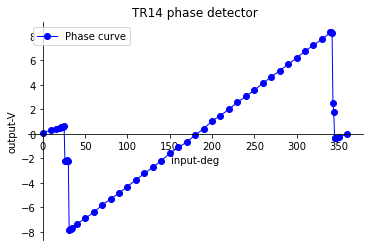

In [32]:
from pylab import gca

plt.plot(x_data, y_data, 'bo-', label=u'Phase curve', linewidth=1)

plt.title(u'TR14 phase detector')
plt.legend()

ax = gca()
ax.spines['right'].set_color('none')   # 撤除右边线
ax.spines['top'].set_color('none')     # 撤除上边线


# 移动坐标轴
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.xlabel(u'input-deg')
plt.ylabel(u'output-V')

我们要移动坐标轴，首先要把旧的坐标拆了。怎么拆呢？原图是上下左右四面都有边界刻度的图像，我们首先把右边界拆了不要了，使用语句 ax.spines['right'].set_color('none')。

把右边界的颜色设置为不可见，右边界就拆掉了。同理，再把上边界拆掉 ax.spines['top'].set_color('none')。

拆完之后，就只剩下我们关心的左边界和下边界了，这俩就是 x 轴和 y 轴。然后我们移动这两个轴，使他们的零点对应起来：

```python
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
```

这样，就完成了坐标轴的移动。

### 绘制图像 V3
我们能不能给图像过零点加个标记呢？显示的告诉看图者，过零点在哪，就免去看完图还得猜，要么就要问作报告的人。

Text(0, 0.5, 'output-V')

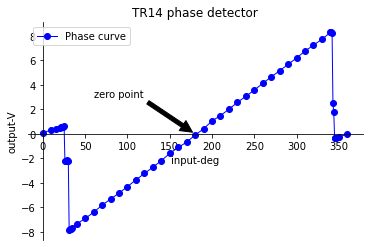

In [53]:
plt.plot(x_data, y_data, 'bo-', label=u"Phase curve", linewidth=1)

plt.annotate('zero point', xy=(180, 0), xytext=(60, 3),          # plt.annotate(标注文字, 标注的数据点, 标注文字坐标, 箭头形状) 
             arrowprops=dict(facecolor='black', shrink=0.05),)   # 标注的数据点是我们感兴趣的，需要说明的数据，而标注文字坐标，需要我们根据效果进行调节，既不能遮挡原曲线，又要醒目。

plt.title(u"TR14 phase detector")
plt.legend()

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.xlabel(u"input-deg")
plt.ylabel(u"output-V")

### 绘制图像 V4
我们把三组数据都画在这幅图上，方便对比，此外，再加上一组理想数据进行对照。这一次我们再做些改进，把横坐标的单位用 LaTeX 引擎显示；不光标记零点，把两边的非线性区也标记出来；

Text(0, 0.5, '$DC/V$')

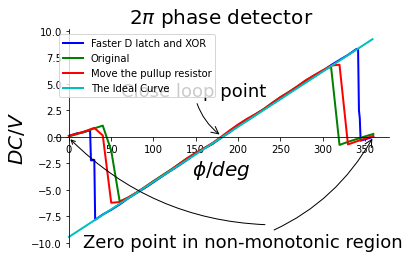

In [55]:
plt.annotate('Close loop point', size=18, xy=(180, 0.1), xycoords='data',
             xytext=(-100, 40), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
             )
plt.annotate(' ', xy=(0, -0.1), xycoords='data',
             xytext=(200, -90), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2")
             )
plt.annotate('Zero point in non-monotonic region', size=18, xy=(360, 0), xycoords='data',
             xytext=(-290, -110), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
             )

plt.plot(x_data, y_data, 'b', label=u"Faster D latch and XOR", linewidth=2)

x_data1, y_data1 = read_xlsx('phase_detector.xlsx')
plt.plot(x_data1, y_data1, 'g', label=u"Original", linewidth=2)

x_data2, y_data2 = read_xlsx('phase_detector2.xlsx')
plt.plot(x_data2, y_data2, 'r', label=u"Move the pullup resistor", linewidth=2)

x_data3 = []
y_data3 = []
for i in range(360):
    x_data3.append(i)
    y_data3.append((i-180)*0.052-0.092)
plt.plot(x_data3, y_data3, 'c', label=u"The Ideal Curve", linewidth=2)

plt.title(u"$2\pi$ phase detector", size=20)
plt.legend(loc=0)  # 显示 label

# 移动坐标轴代码
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.xlabel(u"$\phi/deg$", size=20)
plt.ylabel(u"$DC/V$", size=20)